In [1]:
import pandas as pd
import pandas_profiling
import os

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'aftercoronaNAomit.csv',
 'aftercoronatop10test.csv',
 'aftercovid.csv',
 'after_corona_report.html',
 'b4',
 'beforeClabel.csv',
 'beforeClabel.scv',
 'beforecoronaNAomit.csv',
 'beforecoronaNAomittest.csv',
 'beforecoronatop10test.csv',
 'beforecovid.csv',
 'before_corona_report.html',
 'catboost_info',
 'DATA.csv',
 'DATA2.csv',
 'daycordata.csv',
 'dfa_report.html',
 'dfb_report.html',
 'EDA 레포트 제작.ipynb',
 'finaldata.csv',
 'logs.log',
 'mid_report.html',
 'mid_report.zip',
 'NAomitfinal.csv',
 'sample.csv',
 'test',
 'test.zip',
 'testresult.csv',
 'test_compare',
 'Untitled1.ipynb',
 '모델링 관련.ipynb',
 '상관계수 파악.ipynb',
 '상관계수.png',
 '코로나 데이터셋 레포트.zip',
 '코로나 전후 레포트.zip',
 '피피티용 비교자료']

In [3]:
dfa = pd.read_csv('aftercoronaNAomit.csv',thousands=',' )
dfb = pd.read_csv('beforecoronaNAomit.csv',thousands=',' )

## 레포트 생성

In [23]:
dfareport = dfa.profile_report()
dfbreport = dfb.profile_report()

In [24]:
dfareport.to_file("dfa_report.html")
dfbreport.to_file("dfb_report.html")

## 드롭

In [4]:
print(dfa.columns)
print(dfb.columns)

Index(['Unnamed: 0', 'ONBOARD', 'NATION', 'DESTINATION', 'total', 'EXRATE',
       'gsugi', 'mulga', 'oilprice', 'die', 'rain', 'rainF', 'corona', 'scfi',
       'kospi', 'tide_AGAINST.TIDE', 'tide_WITH.TIDE'],
      dtype='object')
Index(['Unnamed: 0', 'ONBOARD', 'NATION', 'DESTINATION', 'total', 'EXRATE',
       'gsugi', 'mulga', 'oilprice', 'die', 'rain', 'rainF', 'corona', 'scfi',
       'kospi', 'tide_AGAINST.TIDE', 'tide_WITH.TIDE'],
      dtype='object')


In [5]:
feature_drop = ['Unnamed: 0','ONBOARD','NATION','rain','rainF']
dfa1 = dfa.drop(feature_drop, axis=1)
dfb1 = dfb.drop(feature_drop, axis=1)

In [6]:
dfa1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DESTINATION        1440 non-null   object 
 1   total              1440 non-null   float64
 2   EXRATE             1440 non-null   float64
 3   gsugi              1440 non-null   float64
 4   mulga              1440 non-null   float64
 5   oilprice           1440 non-null   float64
 6   die                1440 non-null   int64  
 7   corona             1440 non-null   int64  
 8   scfi               1440 non-null   int64  
 9   kospi              1440 non-null   float64
 10  tide_AGAINST.TIDE  1440 non-null   int64  
 11  tide_WITH.TIDE     1440 non-null   int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 135.1+ KB


In [7]:
dfb1

,DESTINATION,total,EXRATE,gsugi,mulga,oilprice,die,corona,scfi,kospi,tide_AGAINST.TIDE,tide_WITH.TIDE
0,USHOU,2968753.000,1024.800000,7418.7,99.608,96.6,1850,0,185,2067.86,0,1
1,USLGB,2493423.667,1024.266667,7418.7,99.608,96.6,1850,0,185,2067.86,0,1
2,AUFRE,1499580.000,1024.200000,7418.7,99.608,96.6,1850,0,185,2051.58,0,1
3,CNWEI,279172.000,1033.100000,7418.7,99.608,96.6,1850,0,185,2051.58,1,0
4,USNYC,4137390.000,1013.600000,7418.7,99.608,96.6,1850,0,185,2051.20,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8004,USEWR,2675646.500,1174.600000,4330.9,105.120,64.9,2020,0,112,2175.17,0,1
8005,AEJEA,1078970.000,1172.500000,4330.9,105.120,64.9,2020,0,112,2175.17,1,0
8006,USMRT,4316432.000,1173.900000,4330.9,105.120,64.9,2020,0,112,2175.17,0,1
8007,USNYC,2442428.500,1170.650000,4330.9,105.120,64.9,2020,0,112,2175.17,0,1


## 코로나 이전 데이터셋 및 모델링

In [8]:
from pycaret.regression import *
exp1 = setup(dfb1, target='total',remove_outliers=True, normalize=True,
             feature_selection=True)

,Description,Value
0,session_id,841
1,Target,total
2,Original Data,"(8009, 12)"
3,Missing Values,False
4,Numeric Features,6
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(5325, 222)"


In [9]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,383517.3101,309327802109.4671,554713.5920,0.8105,0.3375,0.2794,4.9540
xgboost,Extreme Gradient Boosting,384822.0812,323511105945.6000,567199.0375,0.8018,0.3346,0.2741,1.7210
br,Bayesian Ridge,370510.0599,325904321061.2544,569066.7550,0.8001,0.3382,0.2560,0.1080
llar,Lasso Least Angle Regression,368947.5673,326465642210.7517,569468.1890,0.7998,0.3386,0.2537,0.0490
lasso,Lasso Regression,369069.2344,326399026790.4000,569432.8000,0.7998,0.3387,0.2538,0.4390
rf,Random Forest Regressor,352601.0272,326787214070.8754,570278.9725,0.7995,0.3141,0.2289,2.5330
ridge,Ridge Regression,380207.7344,332141841612.8000,574601.6594,0.7964,0.3432,0.2660,0.0270
et,Extra Trees Regressor,346377.9820,366775407100.8282,604210.4933,0.7749,0.3242,0.2209,2.8700
dt,Decision Tree Regressor,421631.9527,532060172730.9616,727718.9358,0.6730,0.3827,0.2612,0.0740
lightgbm,Light Gradient Boosting Machine,502040.3164,575150359855.9092,756960.5681,0.6481,0.4217,0.3646,0.0830


In [9]:
# LLAR = create_model('llar')
# best_LLAR = tune_model(LLAR)

cat = create_model('catboost')
best_cat = tune_model(cat)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,564801.3827,563652884819.0225,750768.1965,0.6487,0.4267,0.3972
1,572838.1464,607949423375.1771,779711.1153,0.6399,0.4542,0.4225
2,588049.8822,591181716959.3921,768883.4222,0.6700,0.4912,0.5026
3,520574.0493,438876401982.0027,662477.4728,0.7113,0.4252,0.4038
4,537331.6305,463374562420.8799,680716.2128,0.7081,0.4442,0.4328
5,530537.4771,464291201608.9205,681389.1705,0.6973,0.4160,0.3916
6,602460.2856,635593676170.8451,797241.2911,0.6295,0.4864,0.4796
7,547994.1901,507175133460.0425,712162.2943,0.6910,0.4359,0.4175
8,538128.0969,488786665683.0344,699132.7955,0.7124,0.4764,0.4722
9,564053.2821,568244484935.4697,753819.9287,0.6427,0.4366,0.4045


In [10]:
save_model(best_cat, 'cat_model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='total',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select',
                  Advanced_Feature_Selection_Classic(ml_usecase='regression',
                                                     random_state=841,
                                                     subclass='binary',
 

In [11]:
best_cat.get_all_params

<bound method CatBoost.get_all_params of <catboost.core.CatBoostRegressor object at 0x0000019FBB8B21F0>>

In [17]:
# plot_model(estimator=best_LLAR, plot='feature')
plot_model(estimator=best_cat, plot='parameter')

,Parameters
nan_mode,Min
eval_metric,RMSE
iterations,190
sampling_frequency,PerTree
leaf_estimation_method,Newton
grow_policy,SymmetricTree
penalties_coefficient,1
boosting_type,Plain
model_shrink_mode,Constant
feature_border_type,GreedyLogSum


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

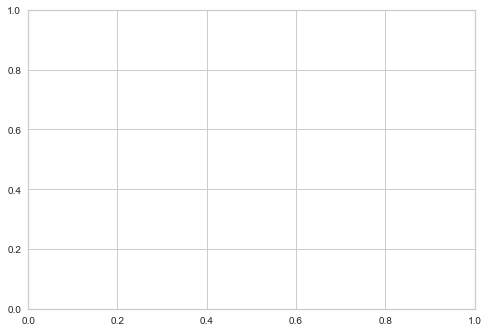

In [103]:
evaluate_model(best_LLAR)

In [12]:
test = pd.read_csv("beforecoronatop10test.csv")
test
feature_drop = ['Unnamed: 0','ONBOARD','NATION','rain','rainF']
test = test.drop(feature_drop, axis=1)

In [13]:
test

,DESTINATION,total,EXRATE,gsugi,mulga,oilprice,die,corona,scfi,kospi,tide_AGAINST.TIDE,tide_WITH.TIDE
0,USHOU,2968753.000,1024.800000,7418.7,99.608,96.6,1850,0,185,2067.86,0,1
1,USLGB,2493423.667,1024.266667,7418.7,99.608,96.6,1850,0,185,2067.86,0,1
2,USNYC,4137390.000,1013.600000,7418.7,99.608,96.6,1850,0,185,2051.20,0,1
3,USDET,4003696.000,1025.500000,7418.7,99.608,96.6,1850,0,185,2056.26,0,1
4,USDET,3805100.000,1044.500000,7418.7,99.608,96.6,1850,0,181,2049.41,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2962,USDET,3420334.000,1168.200000,4330.9,105.120,64.9,2020,0,112,2197.67,0,1
2963,USHOU,2940366.000,1172.200000,4330.9,105.120,64.9,2020,0,112,2197.67,0,1
2964,USLAX,1482753.500,1173.900000,4330.9,105.120,64.9,2020,0,112,2197.67,0,1
2965,CNDLC,342905.000,1172.500000,4330.9,105.120,64.9,2020,0,112,2175.17,1,0


In [14]:
test
cat_final = finalize_model(best_cat)
A = predict_model(cat_final, test)

In [15]:
A
A.columns

Index(['DESTINATION', 'total', 'EXRATE', 'gsugi', 'mulga', 'oilprice', 'die',
       'corona', 'scfi', 'kospi', 'tide_AGAINST.TIDE', 'tide_WITH.TIDE',
       'Label'],
      dtype='object')

In [17]:
feature_drop = ['EXRATE', 'gsugi', 'mulga', 'oilprice', 'die', 'corona', 'scfi', 'kospi', 'tide_AGAINST.TIDE','tide_WITH.TIDE']
A = A.drop(feature_drop, axis=1)

In [18]:
A['DESTINATION'].value_counts()

USLGB    492
HKHKG    399
USNYC    398
USLAX    392
USCHI    274
USHOU    270
USDET    269
USOAK    188
CNDLC    154
IDJKT    131
Name: DESTINATION, dtype: int64

In [19]:
A.to_csv("beforecovid.csv")

In [111]:
df1 = A[A['DESTINATION'] == 'USLGB']
df2 = A[A['DESTINATION'] == 'HKHKG']
df3 = A[A['DESTINATION'] == 'USNYC']
df4 = A[A['DESTINATION'] == 'USLAX']
df5 = A[A['DESTINATION'] == 'USHOU']
df6 = A[A['DESTINATION'] == 'USDET']
df7 = A[A['DESTINATION'] == 'USOAK']
df8 = A[A['DESTINATION'] == 'CNDLC']
df9 = A[A['DESTINATION'] == 'IDJKT']
df10 = A[A['DESTINATION'] == 'USCHI']

In [112]:
df1.to_csv(r"C:\Users\shipo\Data\해양수산경진대회\경태 모델링\test_compare\before_cor\USLCB.csv")
df2.to_csv(r"C:\Users\shipo\Data\해양수산경진대회\경태 모델링\test_compare\before_cor\HKHKG.csv")
df3.to_csv(r"C:\Users\shipo\Data\해양수산경진대회\경태 모델링\test_compare\before_cor\USNYC.csv")
df4.to_csv(r"C:\Users\shipo\Data\해양수산경진대회\경태 모델링\test_compare\before_cor\USLAX.csv")
df5.to_csv(r"C:\Users\shipo\Data\해양수산경진대회\경태 모델링\test_compare\before_cor\USHOU.csv")
df6.to_csv(r"C:\Users\shipo\Data\해양수산경진대회\경태 모델링\test_compare\before_cor\USDET.csv")
df7.to_csv(r"C:\Users\shipo\Data\해양수산경진대회\경태 모델링\test_compare\before_cor\USOAK.csv")
df8.to_csv(r"C:\Users\shipo\Data\해양수산경진대회\경태 모델링\test_compare\before_cor\CNDLC.csv")
df9.to_csv(r"C:\Users\shipo\Data\해양수산경진대회\경태 모델링\test_compare\before_cor\IDJKT.csv")
df10.to_csv(r"C:\Users\shipo\Data\해양수산경진대회\경태 모델링\test_compare\before_cor\USCHI.csv")

In [73]:
A.to_csv(r'C:\Users\shipo\Data\해양수산경진대회\경태 모델링\test\beforecorona\CNDLCl.csv')

## 코로나 후 

In [11]:
from pycaret.regression import *
exp1 = setup(dfa1, target='total',remove_outliers=True, normalize=True,
             feature_selection=True)

,Description,Value
0,session_id,940
1,Target,total
2,Original Data,"(1440, 12)"
3,Missing Values,False
4,Numeric Features,6
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(956, 154)"


In [21]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
llar,Lasso Least Angle Regression,431190.8800,426236623126.6598,646759.8005,0.7385,0.3595,0.2362,0.0290
lasso,Lasso Regression,434878.6344,427511611392.0000,647614.1625,0.7379,0.3628,0.2416,0.0370
xgboost,Extreme Gradient Boosting,465164.3469,453176508416.0000,667301.4875,0.7238,0.3442,0.2734,0.3090
ridge,Ridge Regression,485393.2844,467747599155.2000,680245.0875,0.7160,0.3544,0.2928,0.0110
catboost,CatBoost Regressor,511095.2163,491235404576.5123,696389.9218,0.7016,0.3715,0.3166,2.2530
rf,Random Forest Regressor,480611.5394,491376090849.6117,693322.4040,0.7012,0.3601,0.2820,0.4170
et,Extra Trees Regressor,449678.3444,531975171504.0809,716295.6612,0.6751,0.3476,0.2406,0.4750
gbr,Gradient Boosting Regressor,630519.8483,646676575453.5895,802030.7297,0.6075,0.4335,0.4098,0.1160
dt,Decision Tree Regressor,549546.0038,739618271632.1002,847929.5172,0.5463,0.4115,0.2945,0.0170
omp,Orthogonal Matching Pursuit,701583.0865,887278450772.9844,938060.7758,0.4622,0.4763,0.4384,0.0100


In [12]:
LLAR = create_model('llar')
best_LLAR = tune_model(LLAR)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,325198.9750,194507609910.3324,441030.1689,0.8800,0.2521,0.1734
1,448731.4745,419324713778.0816,647552.8656,0.6919,0.3807,0.2084
2,375657.6955,309647663331.6012,556459.9387,0.8323,0.3070,0.2145
3,344071.4813,219186802510.6276,468173.9020,0.8435,0.1988,0.1519
4,414965.1176,442492815158.0251,665201.3343,0.7567,0.2821,0.1733
5,394515.0798,318131918372.2903,564031.8416,0.7791,0.3572,0.1918
6,374683.9845,319798370602.4564,565507.1800,0.7862,0.2999,0.2201
7,467254.4869,657301117311.3524,810741.0914,0.6634,0.4207,0.3433
8,453687.5363,482366047287.3030,694525.7715,0.6951,0.3198,0.1914
9,466161.5680,441132946695.7711,664178.3998,0.7469,0.2827,0.2152


In [13]:
save_model(best_LLAR, 'llar_model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='total',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                                                     subclass='binary',
                                                     target='total',
                                                     top_features_to_pick=0.19999999999999996)),
                 ('fix_multi', 'passthrough'), ('dfs', 'passthrough'),
    

In [ ]:
plot_model(estimator=best_, plot='parameter')

In [23]:
test = pd.read_csv("aftercoronatop10test.csv")
test
feature_drop = ['Unnamed: 0','ONBOARD','NATION','rain','rainF']
test = test.drop(feature_drop, axis=1)

In [24]:
test

,DESTINATION,total,EXRATE,gsugi,mulga,oilprice,die,corona,scfi,kospi,tide_AGAINST.TIDE,tide_WITH.TIDE
0,USLAX,1480873.0,1172.20,1006.5,105.79,64.3,2020,0,112,2175.17,0,1
1,USDET,3701020.0,1172.20,1006.5,105.79,64.3,2020,0,112,2175.17,0,1
2,USLAX,1489812.0,1169.10,1006.5,105.79,64.3,2020,0,112,2175.17,0,1
3,USNYC,2500525.0,1173.90,1006.5,105.79,64.3,2020,0,112,2175.17,0,1
4,USOAK,1564634.0,1169.10,1006.5,105.79,64.3,2020,0,112,2175.17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
421,USLGB,3830950.0,1196.90,10125.5,106.20,41.5,2020,61,118,2278.79,0,1
422,USHOU,3799732.0,1171.90,10125.5,106.20,41.5,2020,50,118,2308.08,0,1
423,USLAX,2776194.5,1178.85,10125.5,106.20,41.5,2020,50,118,2308.08,0,1
424,USLAX,3686071.0,1181.70,10125.5,106.20,41.5,2020,38,118,2327.89,0,1


In [26]:
test
llar_final = finalize_model(best_LLAR)
A = predict_model(llar_final, test)

In [27]:
A
A.columns

Index(['DESTINATION', 'total', 'EXRATE', 'gsugi', 'mulga', 'oilprice', 'die',
       'corona', 'scfi', 'kospi', 'tide_AGAINST.TIDE', 'tide_WITH.TIDE',
       'Label'],
      dtype='object')

In [28]:
feature_drop = ['EXRATE', 'gsugi', 'mulga', 'oilprice', 'die', 'corona', 'scfi', 'kospi', 'tide_AGAINST.TIDE','tide_WITH.TIDE']
A = A.drop(feature_drop, axis=1)

In [29]:
A

,DESTINATION,total,Label
0,USLAX,1480873.0,2.269491e+06
1,USDET,3701020.0,3.963533e+06
2,USLAX,1489812.0,2.257800e+06
3,USNYC,2500525.0,3.021798e+06
4,USOAK,1564634.0,1.828137e+06
...,...,...,...
421,USLGB,3830950.0,2.821861e+06
422,USHOU,3799732.0,3.308407e+06
423,USLAX,2776194.5,2.758623e+06
424,USLAX,3686071.0,2.783748e+06


In [30]:
A.to_csv("aftercovid.csv")